In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("train.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:

df.drop(['Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.isnull().sum()


C:\Users\LOQ\AppData\Local\Temp\ipykernel_17212\2698218863.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\LOQ\AppData\Local\Temp\ipykernel_17212\2698218863.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

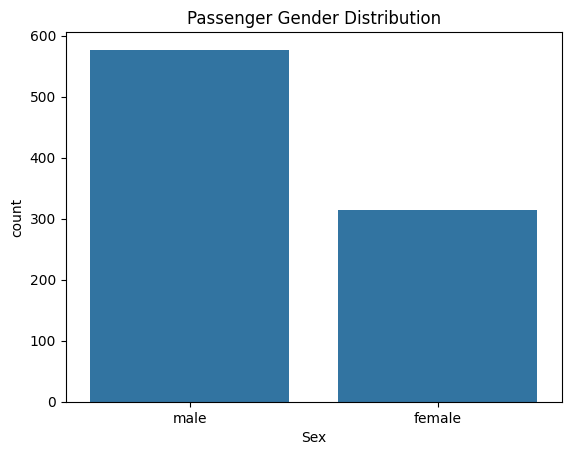

In [10]:
sns.countplot(data=df, x='Sex')
plt.title("Passenger Gender Distribution")
plt.show()

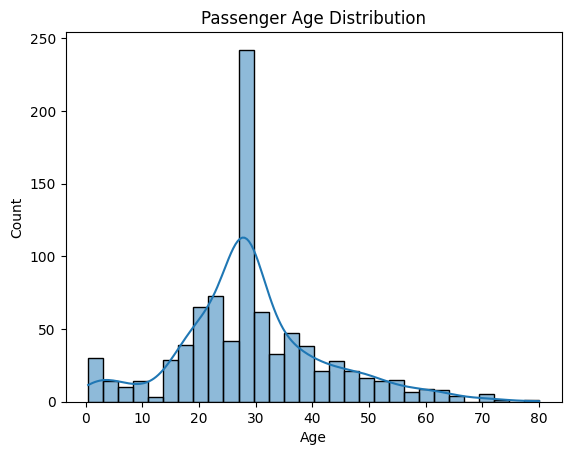

In [11]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Passenger Age Distribution")
plt.show()


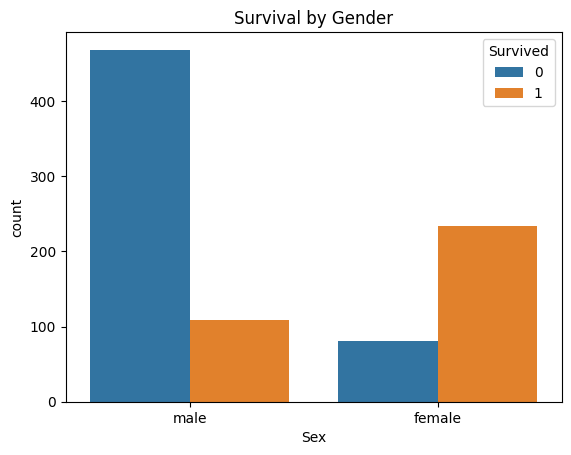

In [9]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Gender")
plt.show()

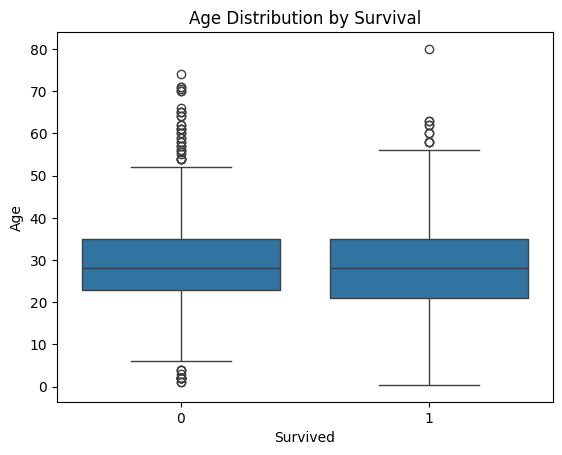

In [10]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()

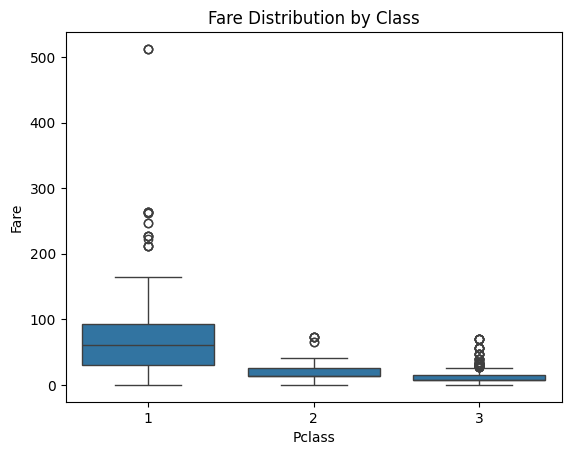

In [11]:
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare Distribution by Class")
plt.show()

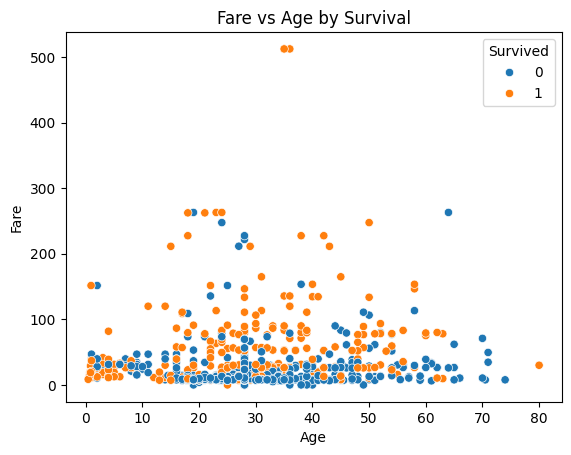

In [12]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Fare vs Age by Survival")
plt.show()

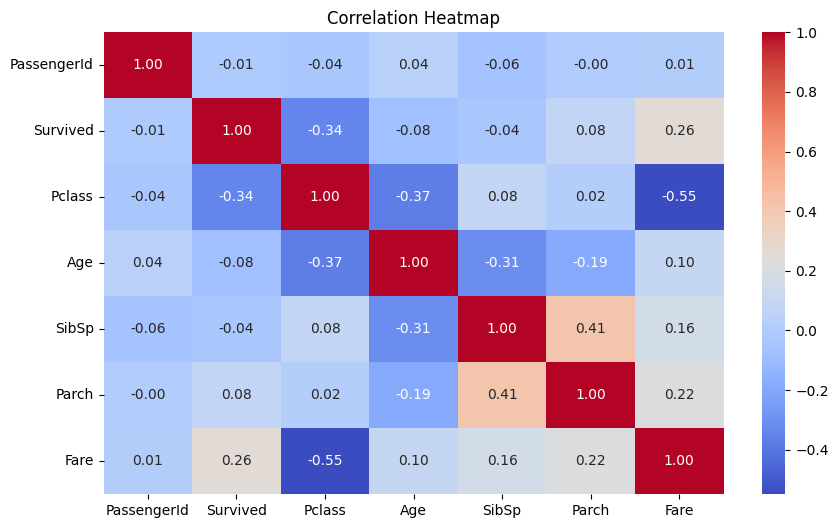

In [7]:

df_numeric = df.copy()

df_numeric['Sex'] = df_numeric['Sex'].map({'male': 0, 'female': 1})
df_numeric['Embarked'] = df_numeric['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

corr_matrix = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Key Insights;  
  
  
  Survival vs Gender:

Strong positive correlation between Sex (female coded as 1) and Survival (0.54).
Women had significantly higher survival rates than men.
This supports the "women first" evacuation rule.

 Survival vs Passenger Class:
Moderate negative correlation between Pclass and Survival (-0.31).
Passengers in 1st class had better survival odds, while 3rd class passengers had the worst.
Wealth/social status played a big role in survival chances.

 Survival vs Fare:
Positive correlation between Fare and Survival (0.26).
Passengers who paid higher fares (linked to higher class) had better chances of survival.
Suggests ticket cost/class was tied to location on the ship and evacuation priority.

 Survival vs Age:
Weak negative correlation between Age and Survival (-0.08).
Younger passengers (especially children) had slightly higher survival chances.
“Children first” also appears in the data, but the effect isn’t as strong as gender/class.

CONCLUSION:

Female passengers and children had better chances of survival.
Wealthier passengers (1st class, higher fares) survived more often.
3rd class, males, older passengers had lower survival rates.
Titanic survival was strongly influenced by gender, class, and wealth.